<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_7_DDS4_Fundamentos_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 7 - DDS4 - Fundamentos de Machine Learning**

## **Importação dos Dados de Custos Médicos**

In [90]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
# via ambiente de trabalho

caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---

## **Análise Exploratória dos Dados** 

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 

In [95]:
import sweetviz as sv

In [96]:
eda = sv.analyze(source = dados, 
                 target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


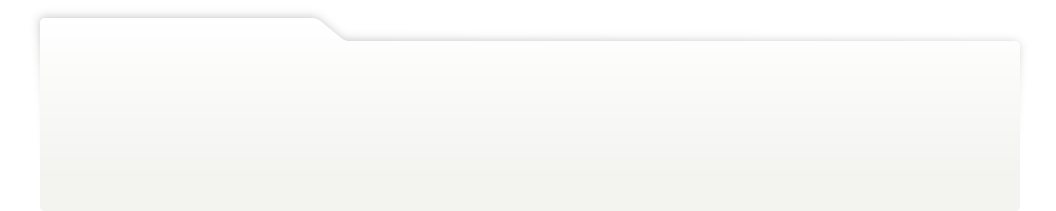
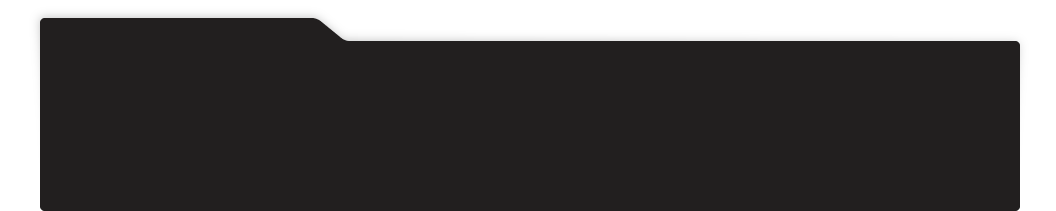
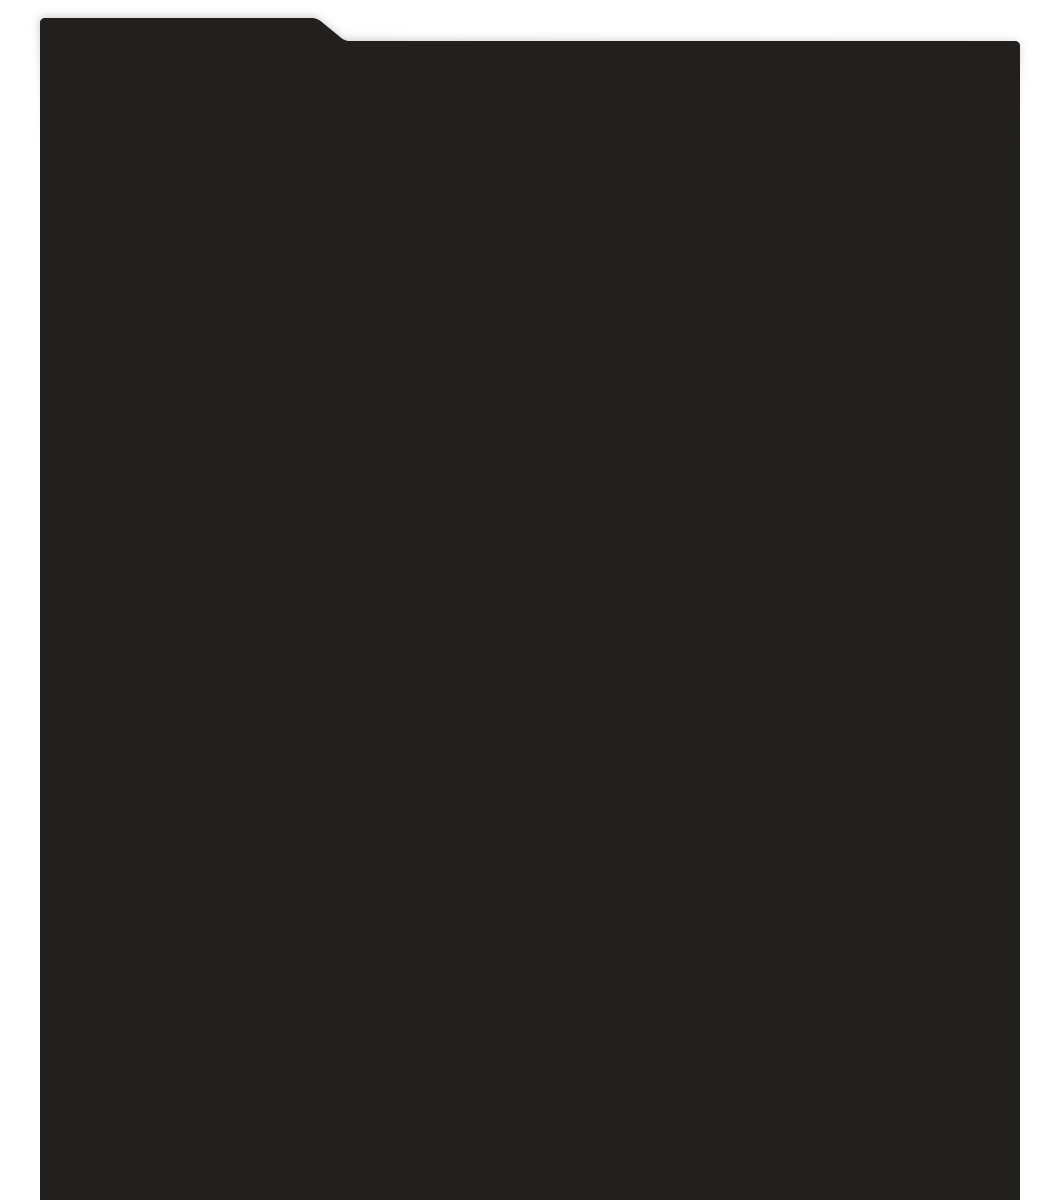
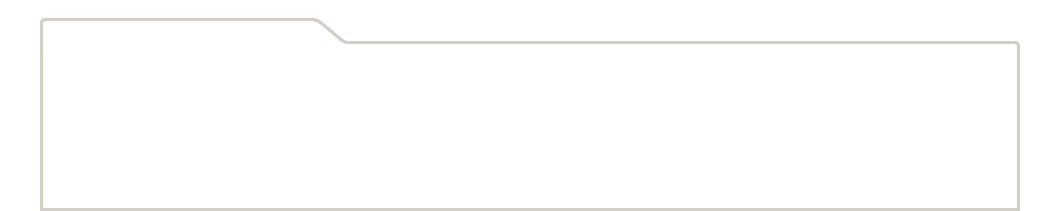
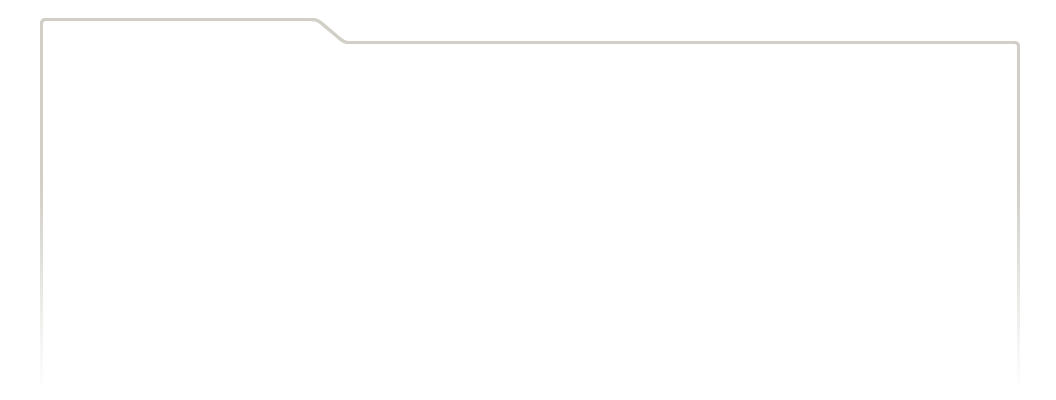
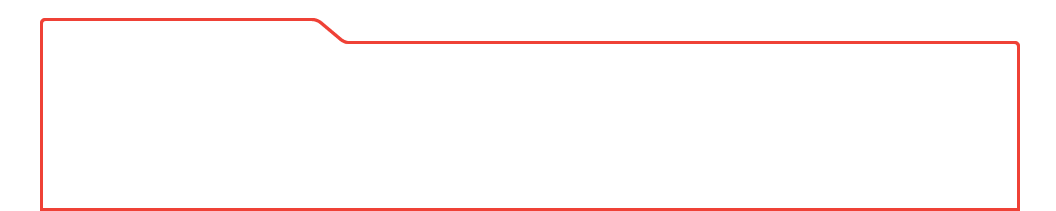
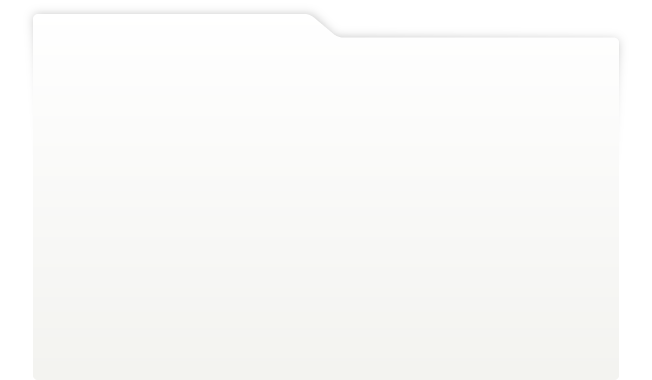
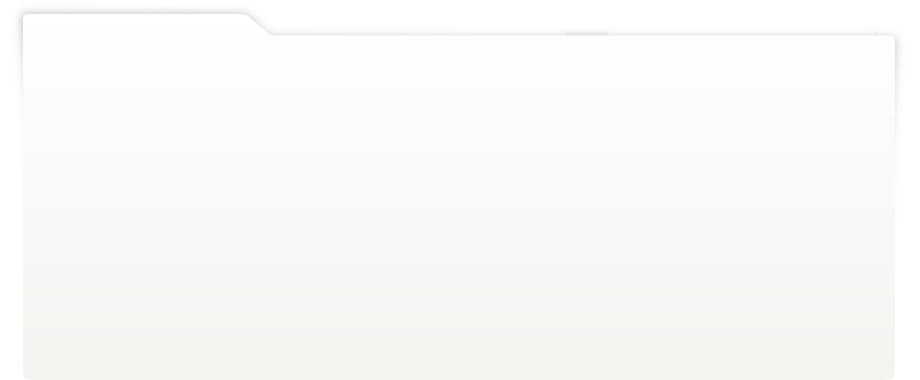
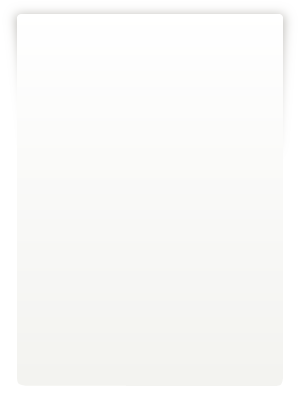
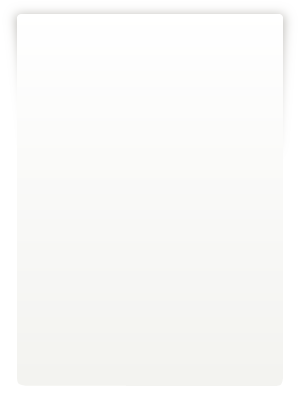
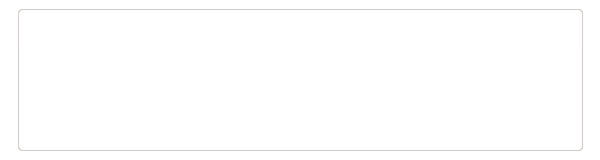
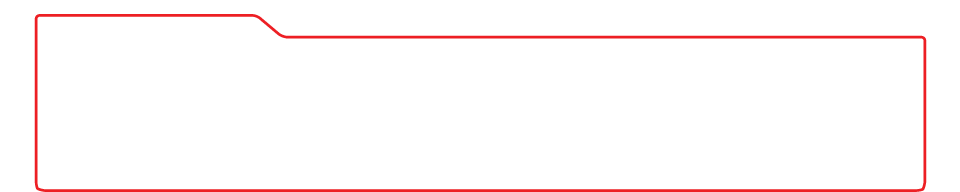
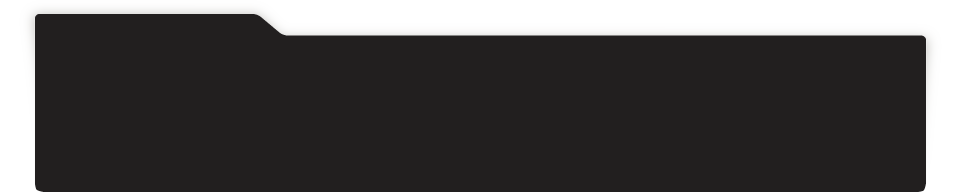
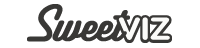
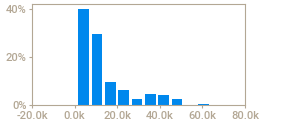
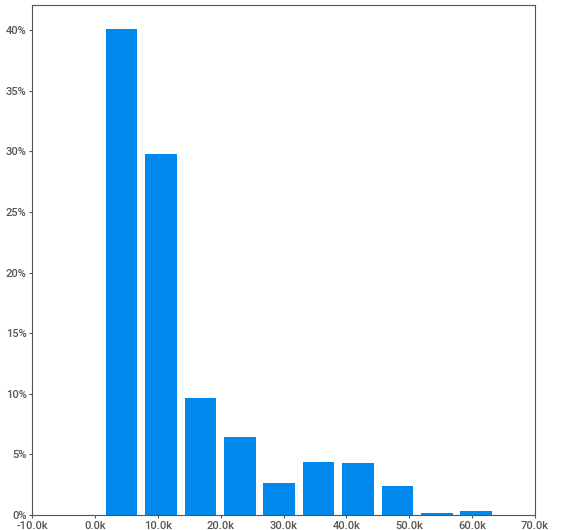
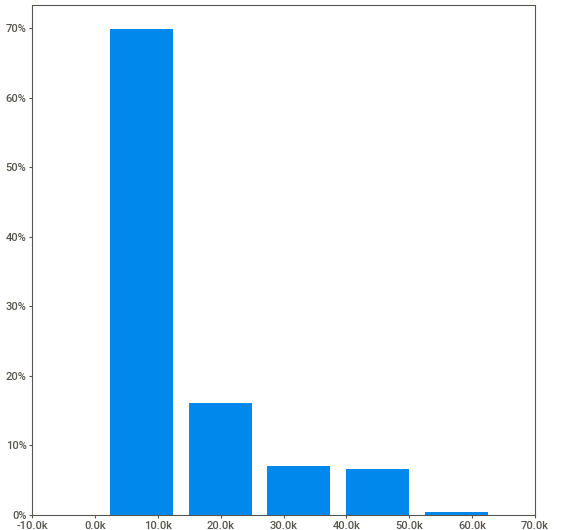
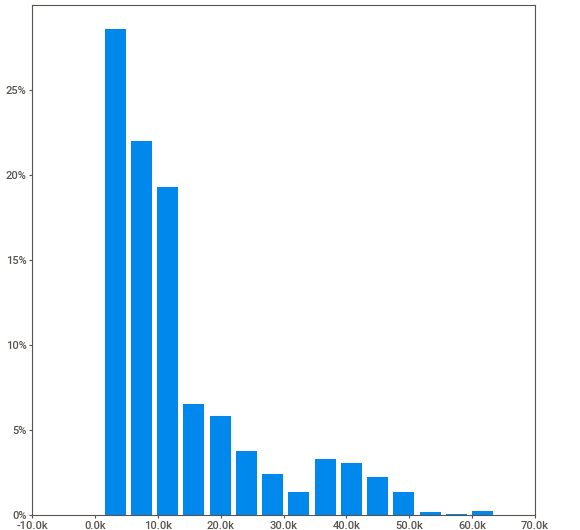
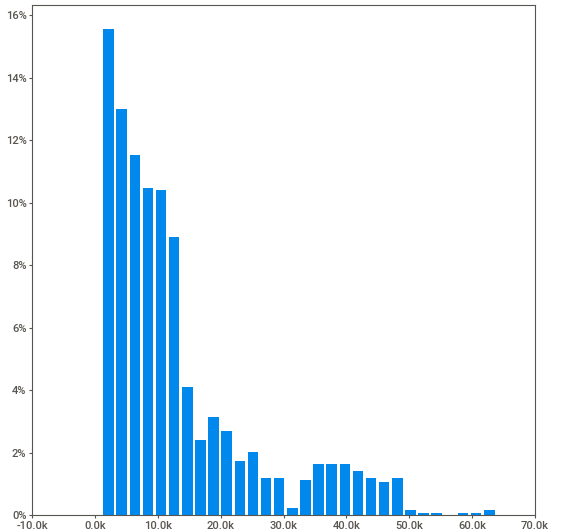
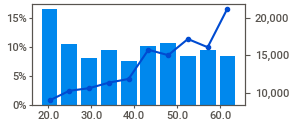
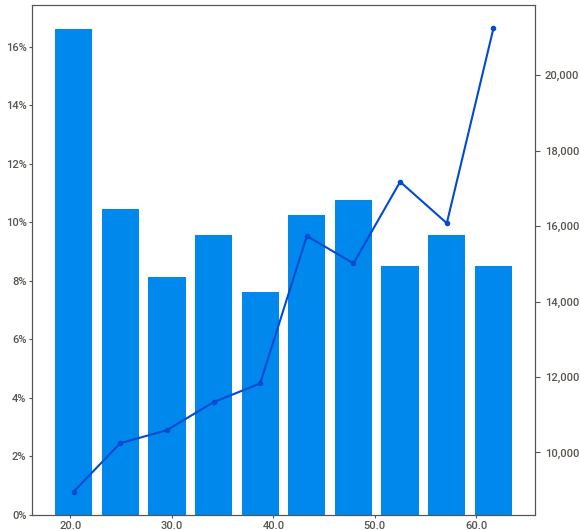
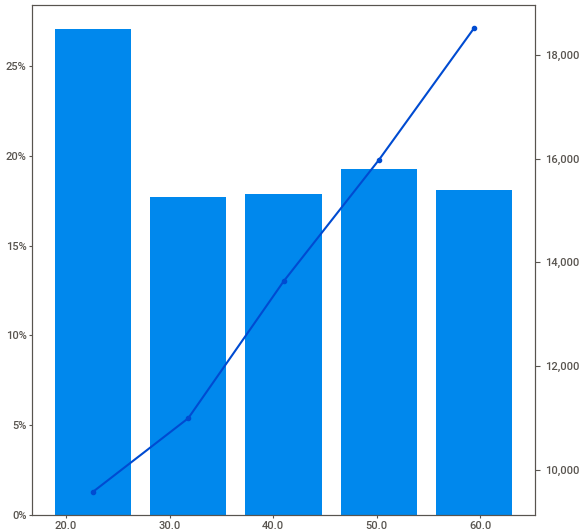
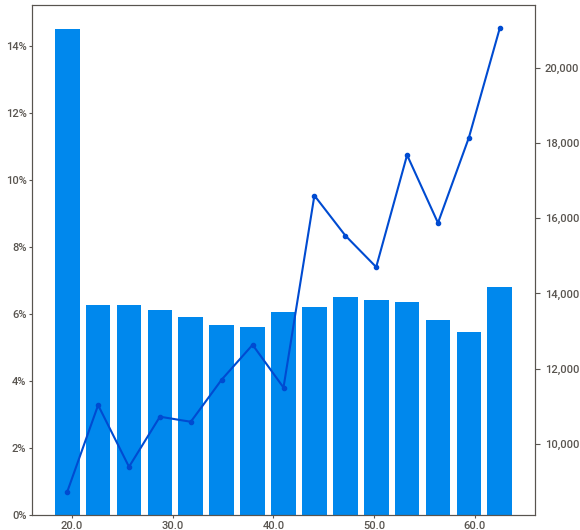
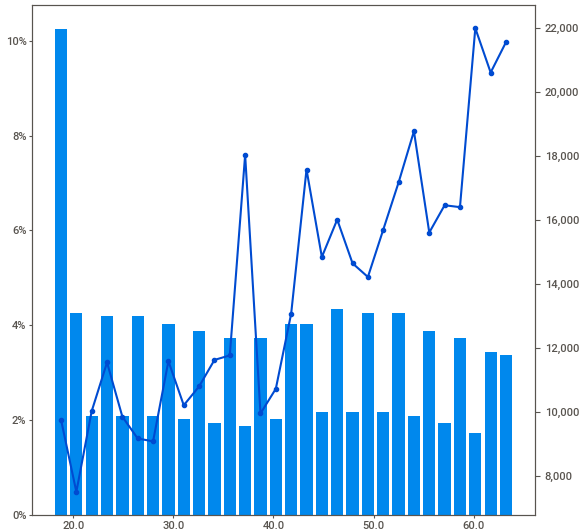
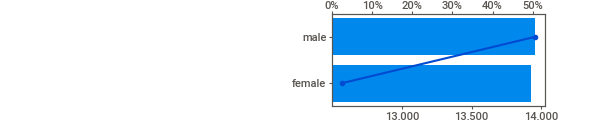
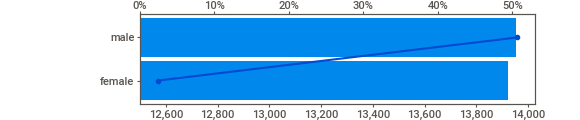
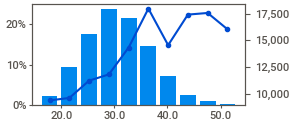
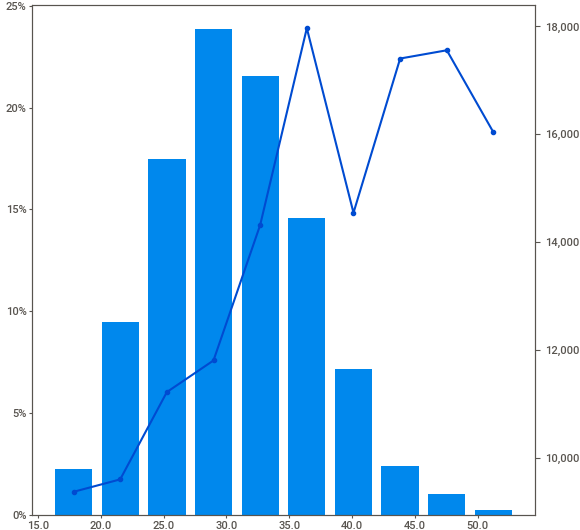
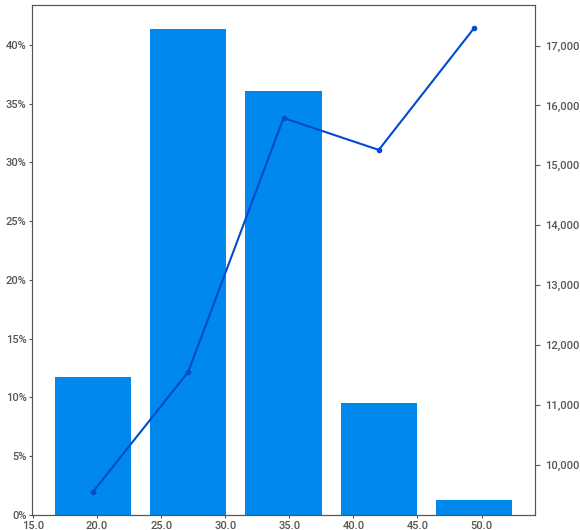
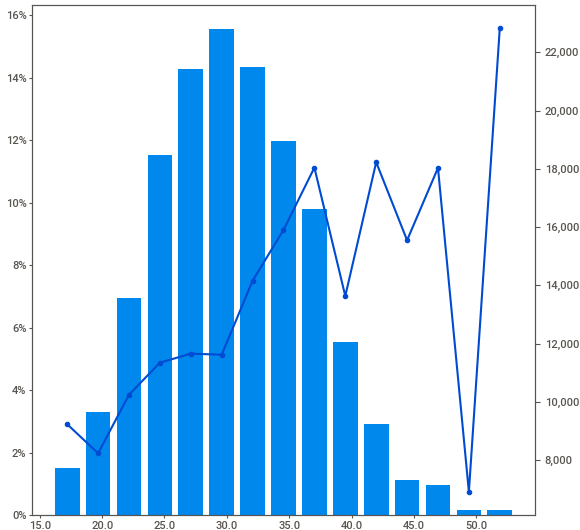
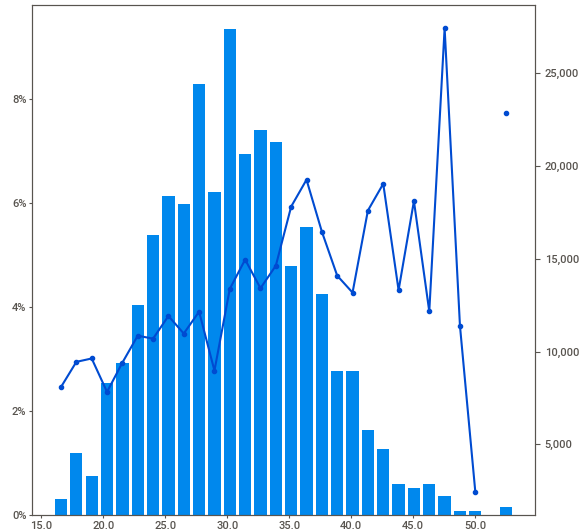
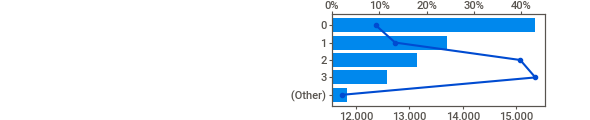
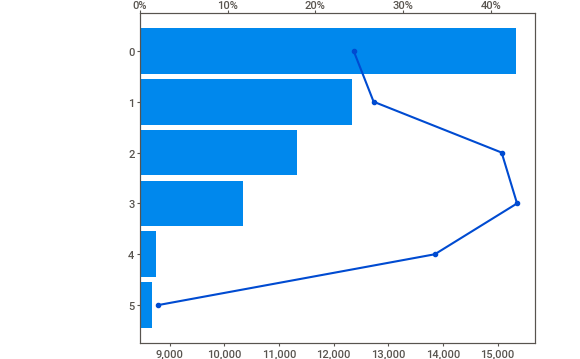
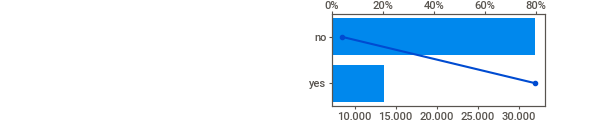
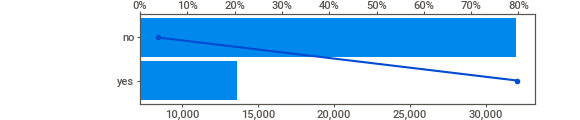
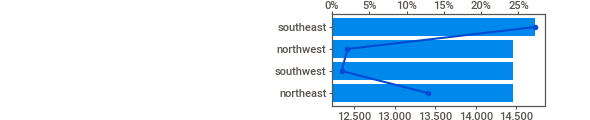
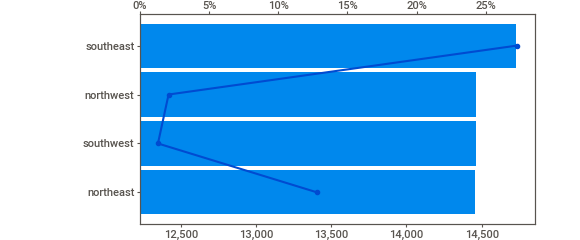
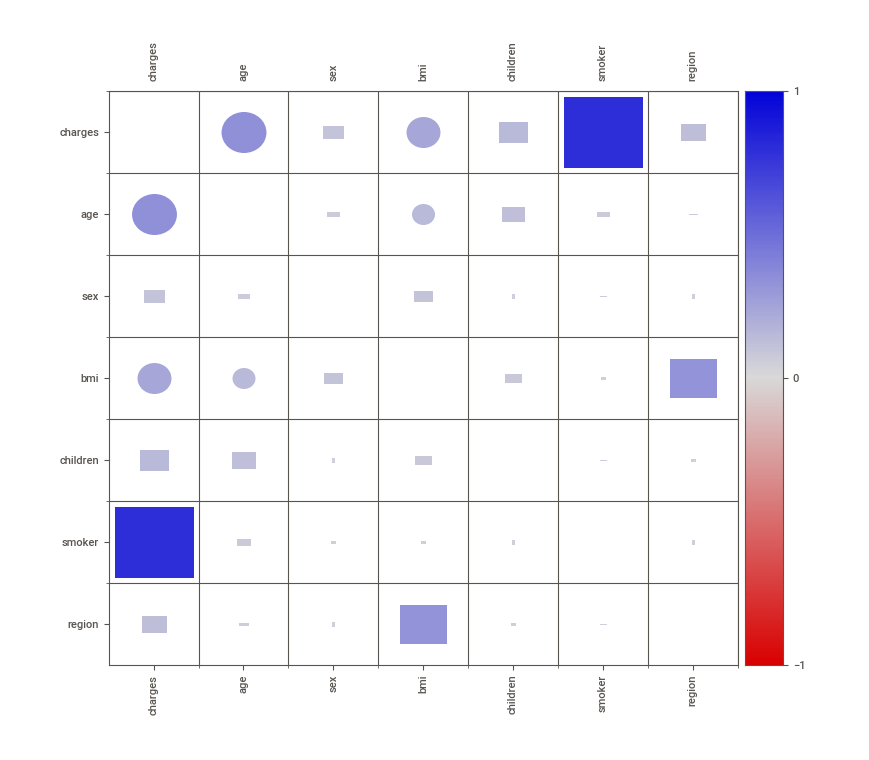
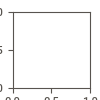

In [98]:
eda.show_notebook()

In [99]:
eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['sex'] == 'male',
                              names = ['Masculino', 'Feminino'],
                              target_feat = 'smoker')

                                             |          | [  0%]   00:00 -> (? left)


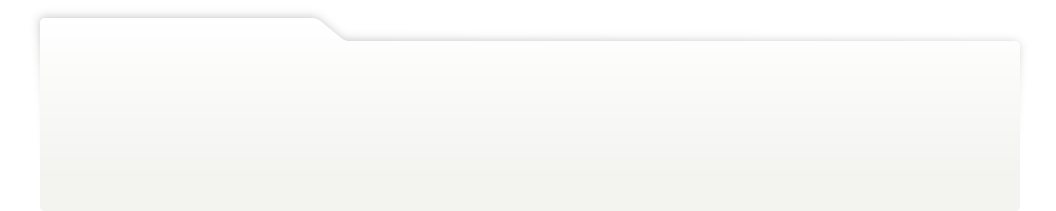
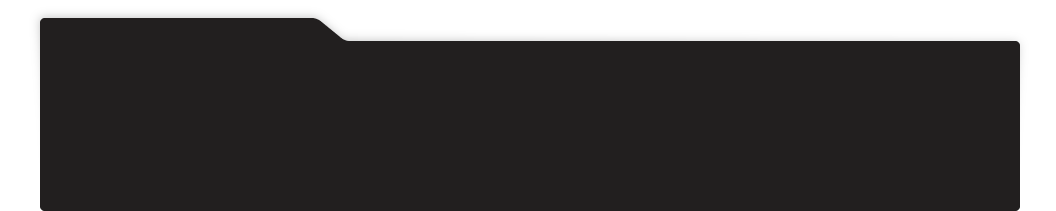
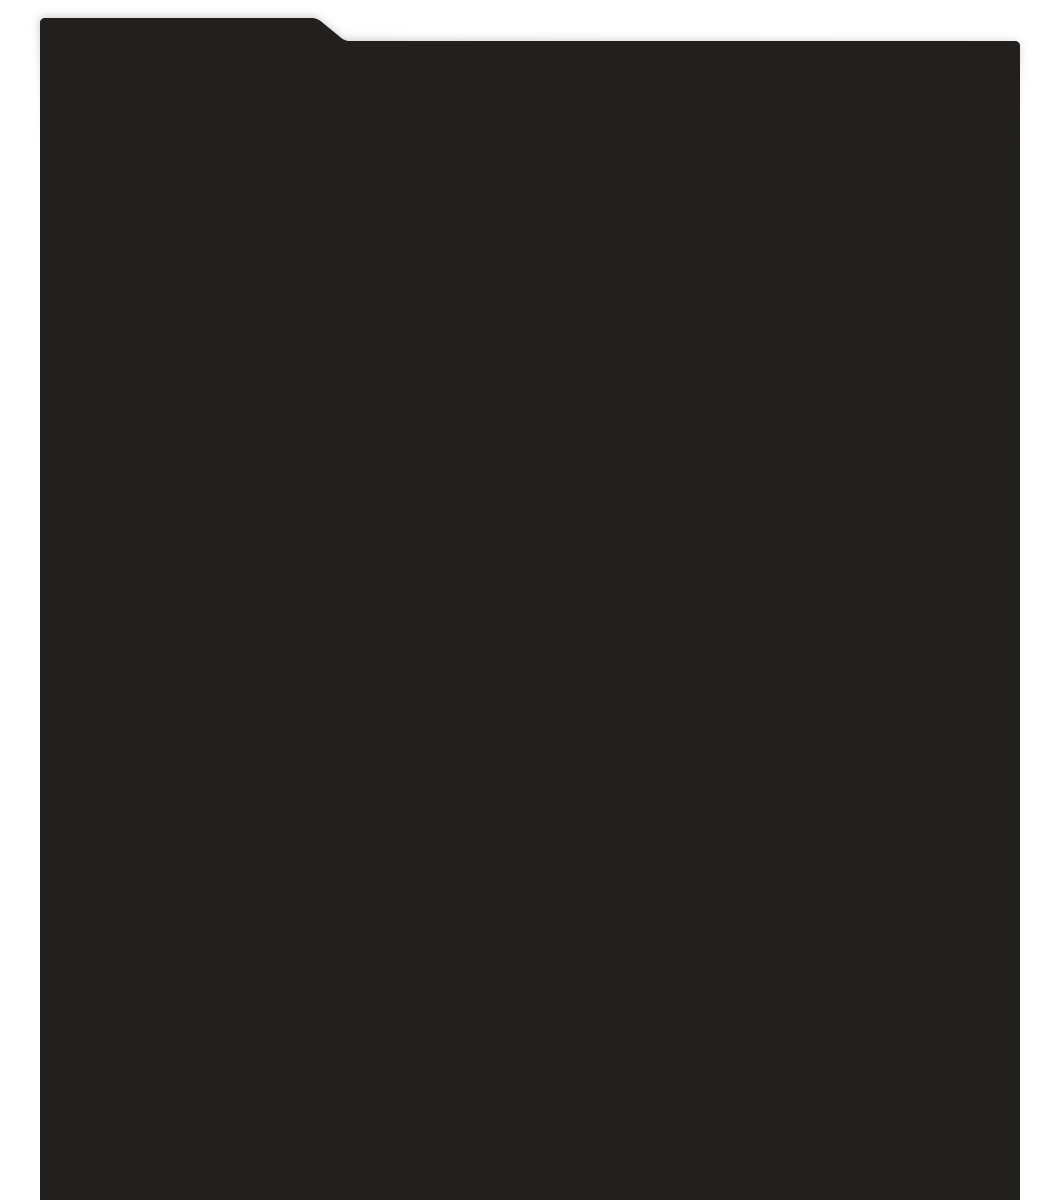
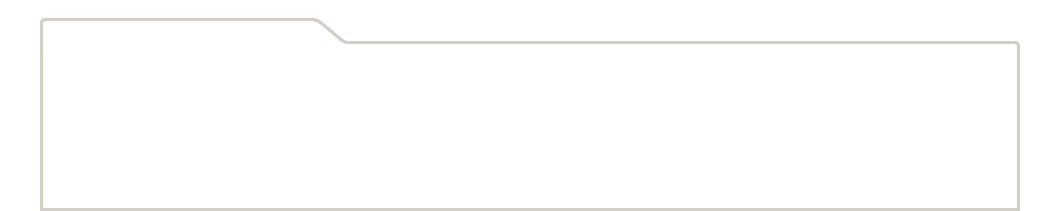
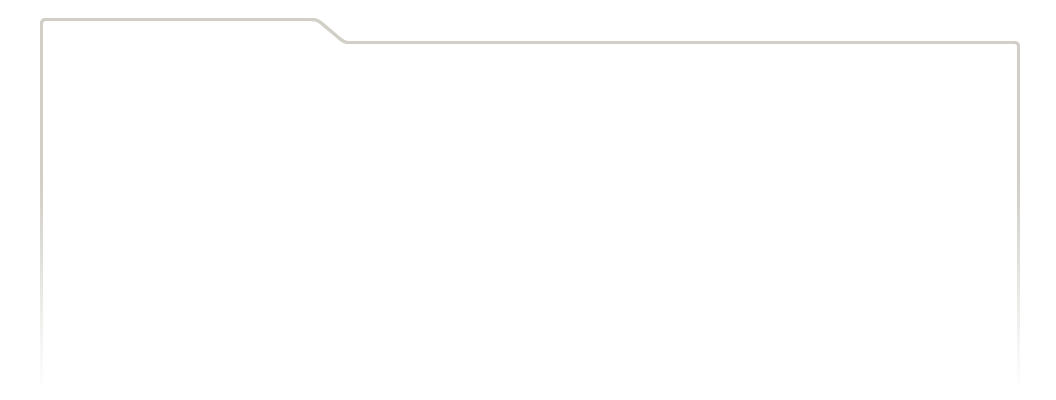
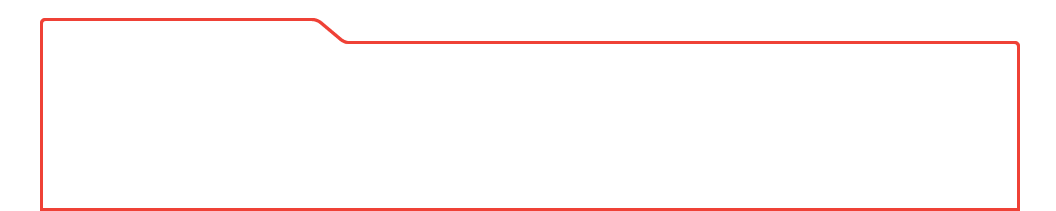
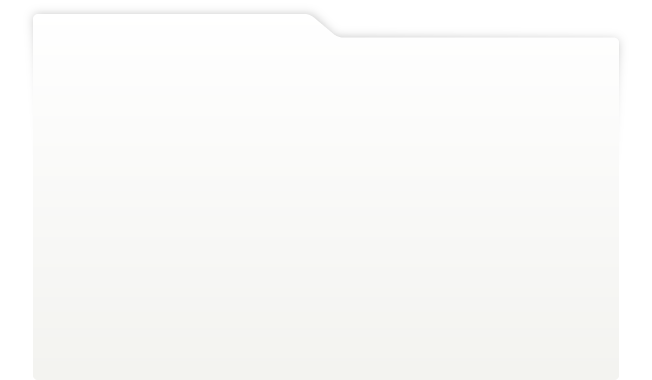
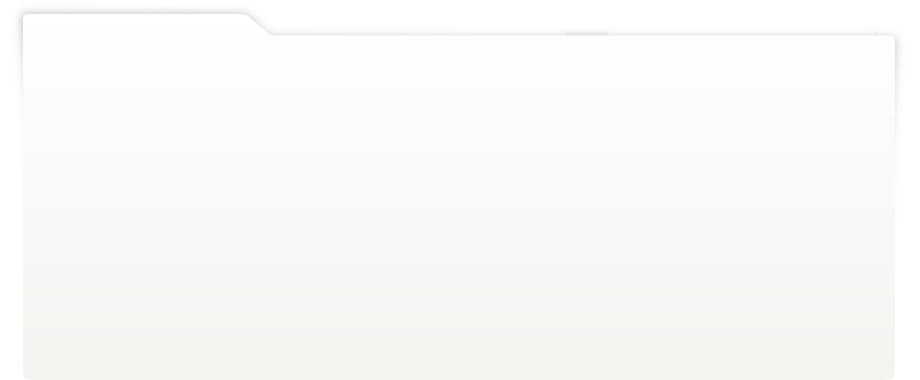
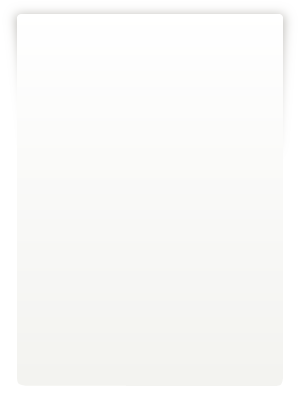
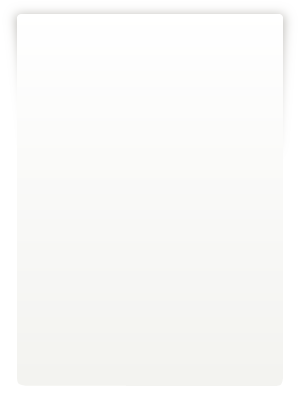
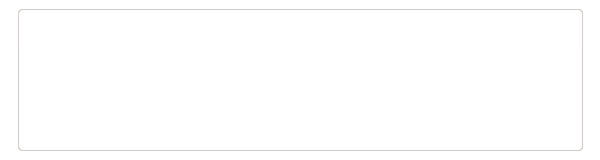
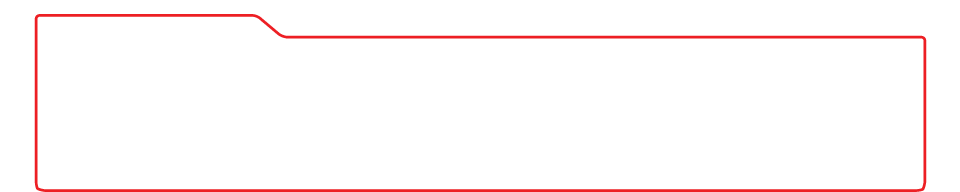
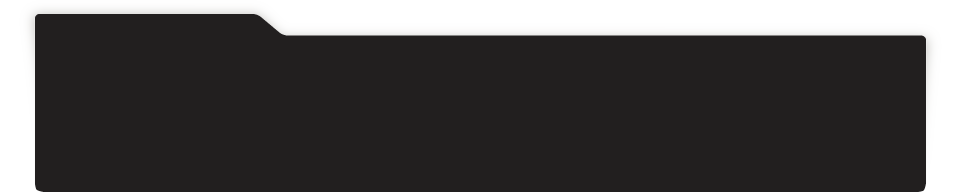
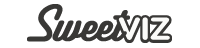
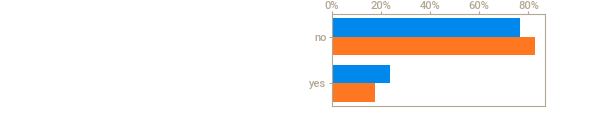
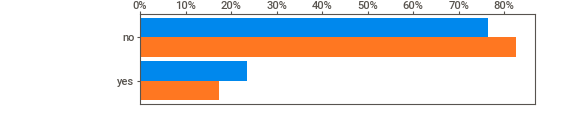
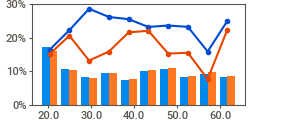
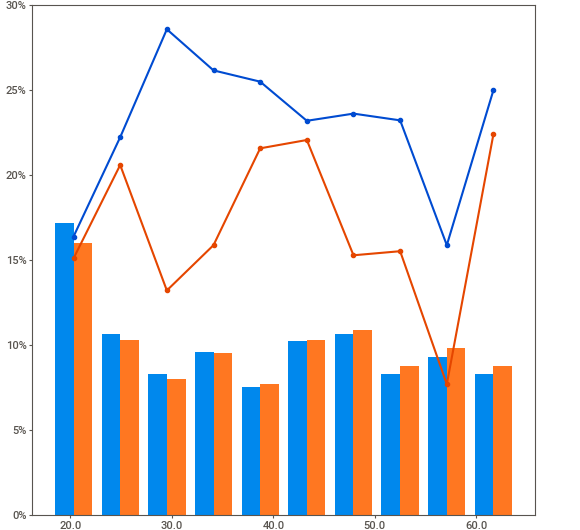
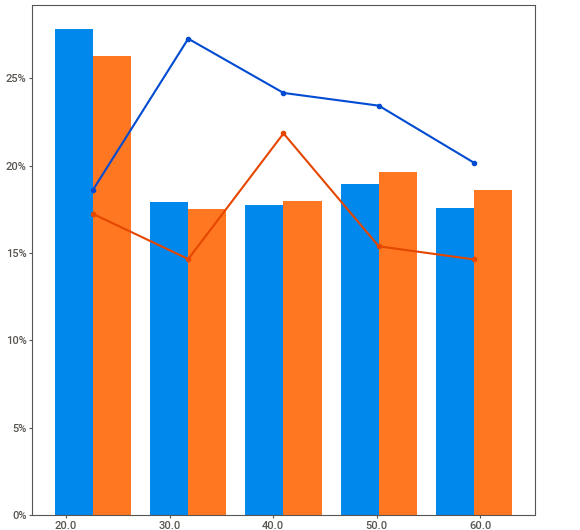
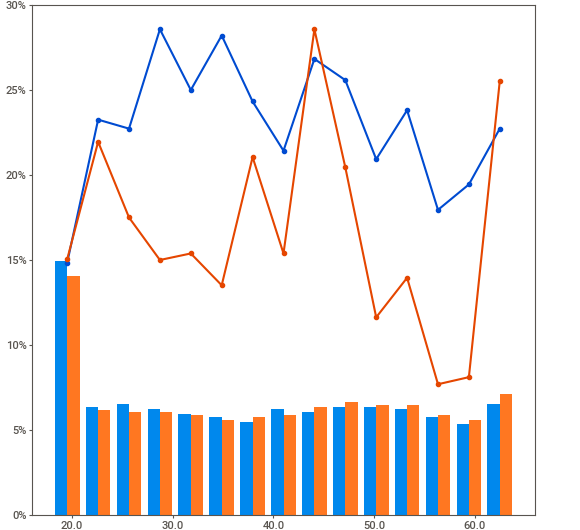
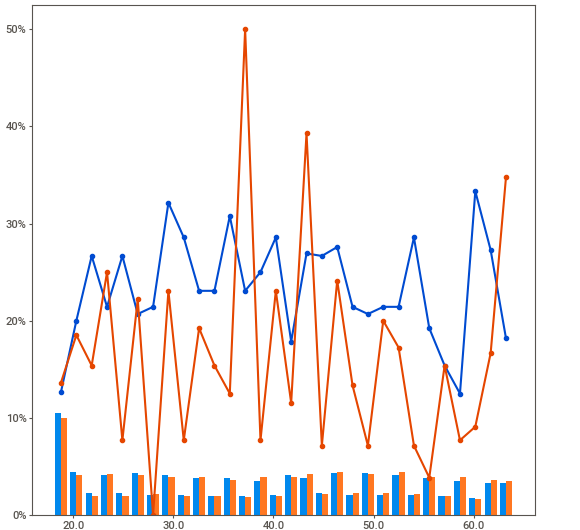
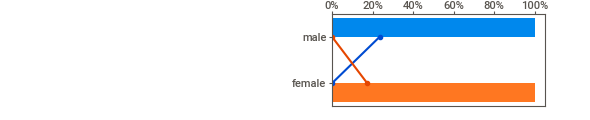
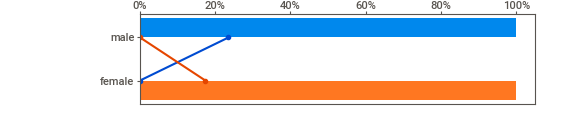
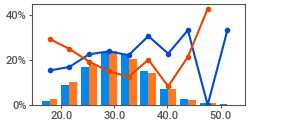
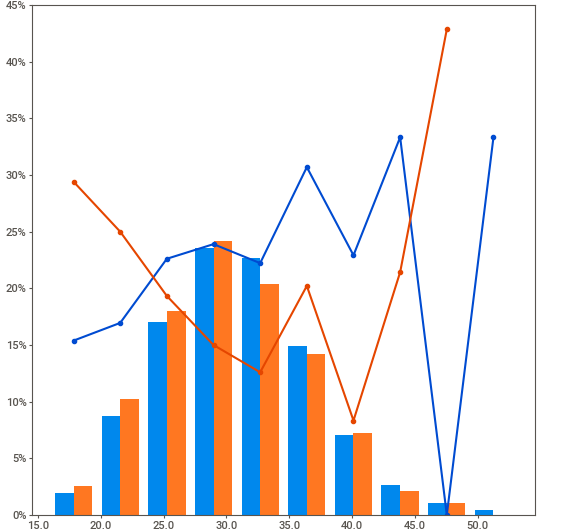
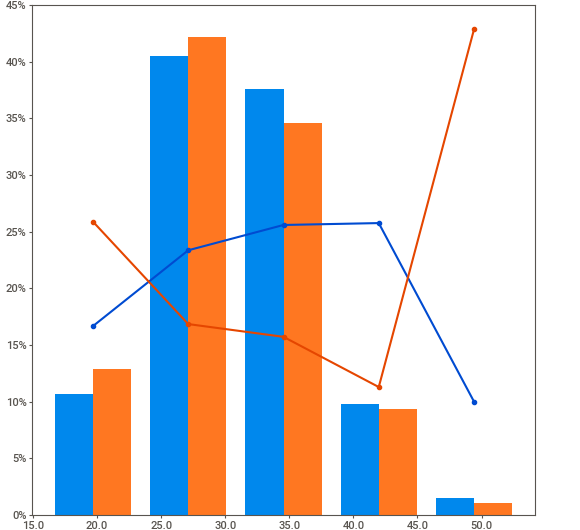
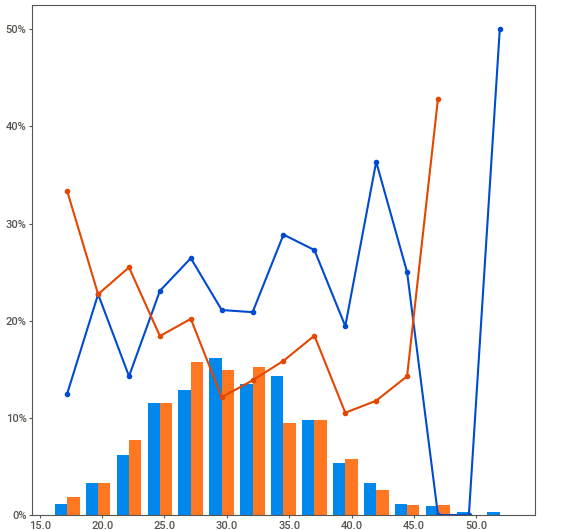
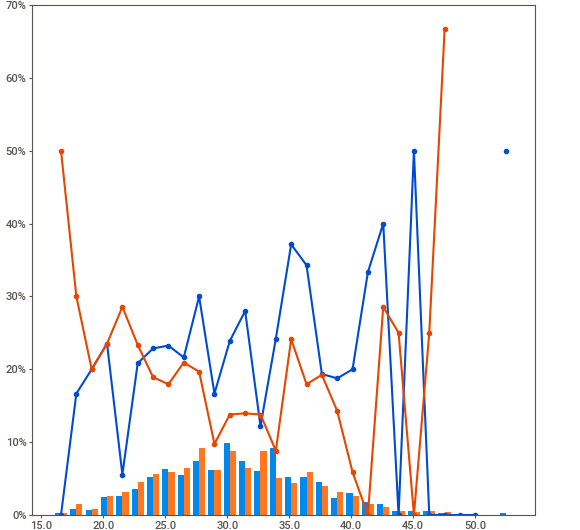
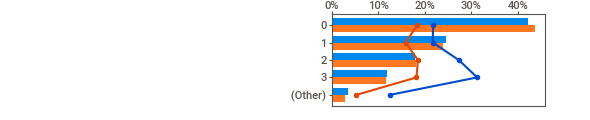
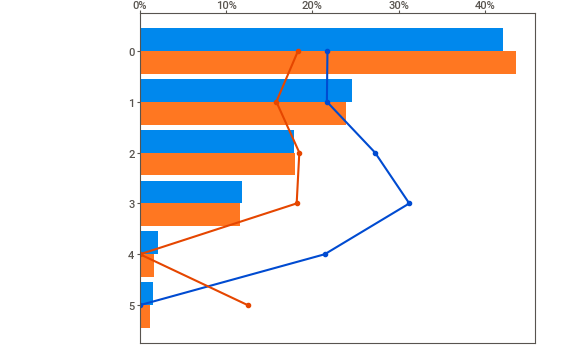
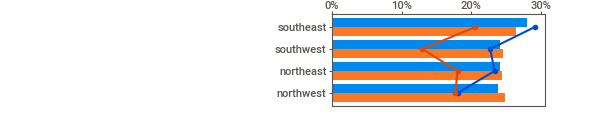
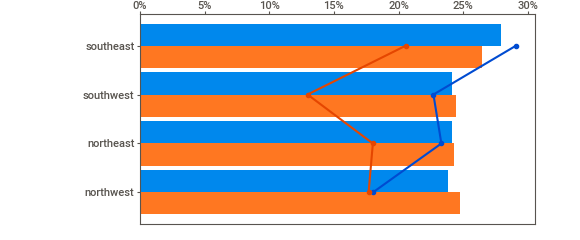
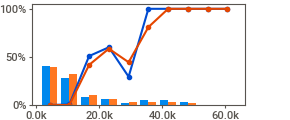
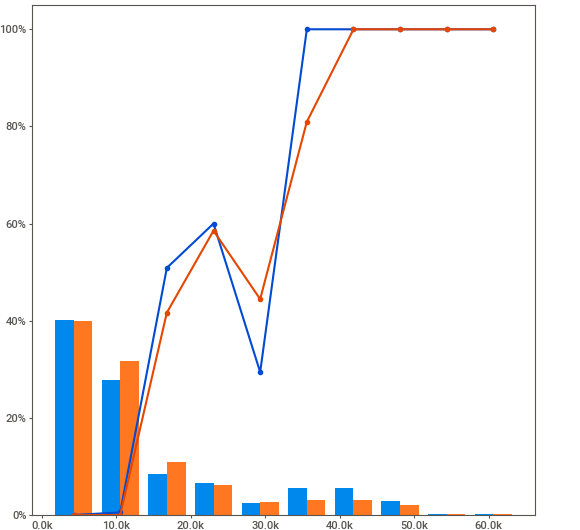
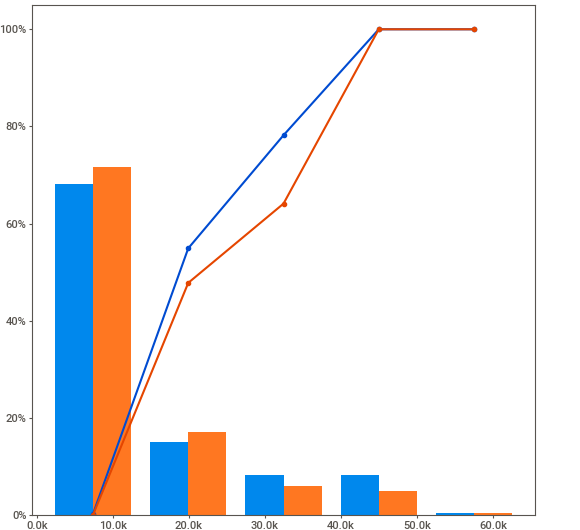
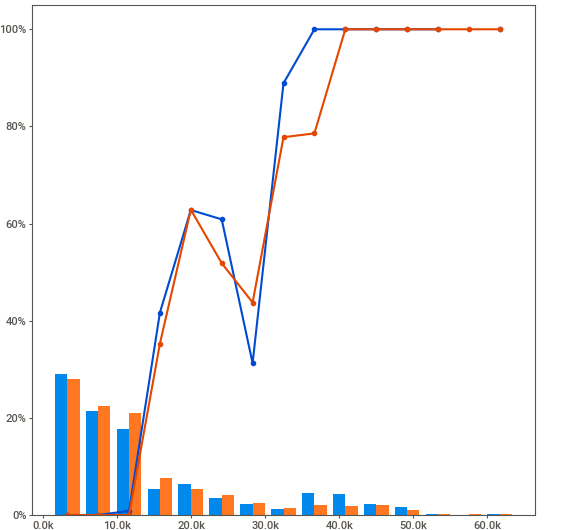
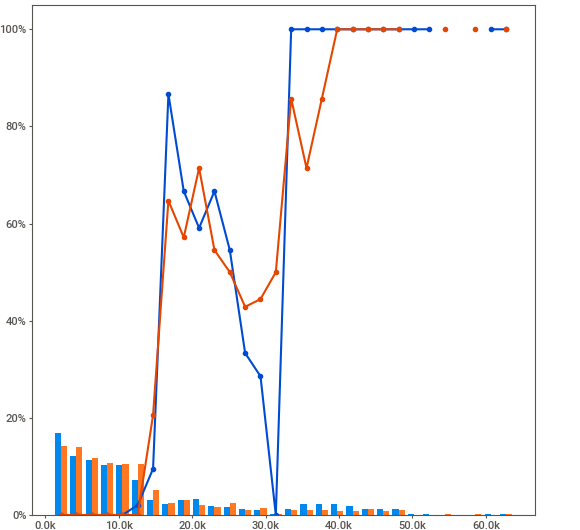
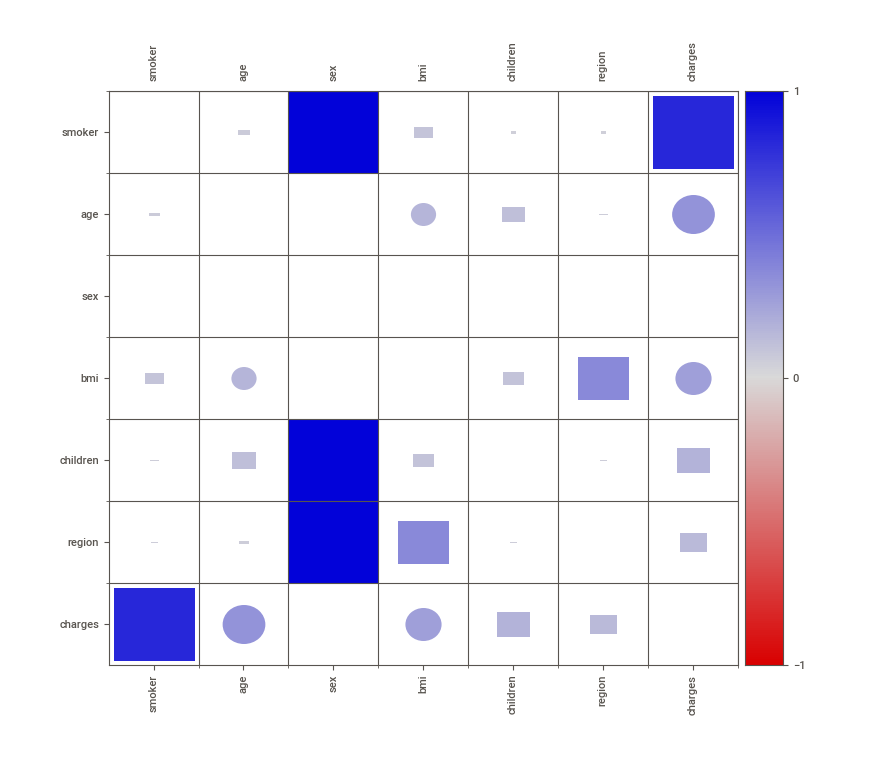
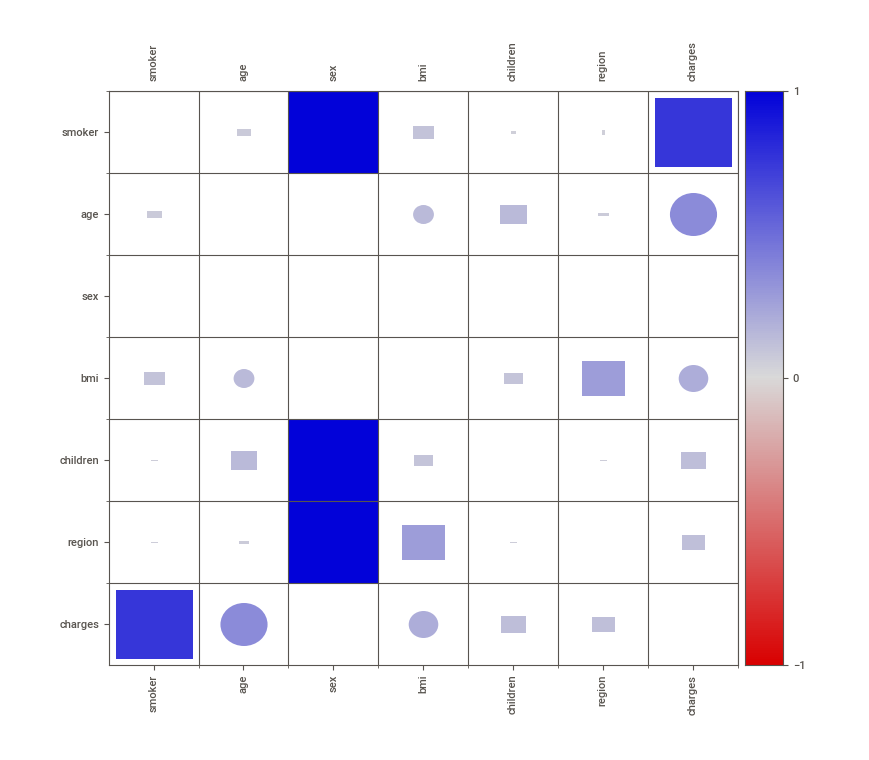

In [100]:
eda2.show_notebook()
#eda2.show_html(layout = 'vertical')

---

## **_Mise en place_ para Modelagem**

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero. 

Para tanto, façamos as seguintes transformações:

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [101]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

Nessa análise, a princípio, vamos considerar as variáveis: charges, bmi e smoker.

In [102]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


Veja essas variáveis no gráfico de dispersão:

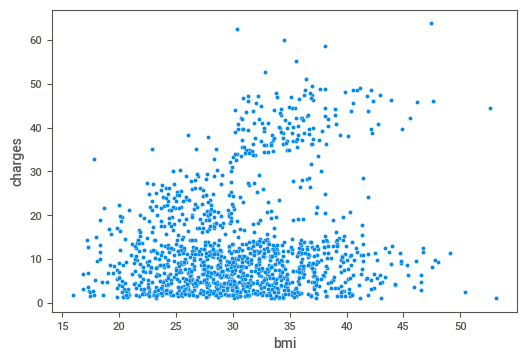

In [103]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
#sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Nosso Primeiro Modelo de Machine Learning**

In [109]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

X = dados[['bmi']]
y = dados['charges'] 

regressao = LinearRegression()
regressao.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

In [110]:
# Resgatando os coeficientes ajustados

print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


In [114]:
# Usando o modelo de regressão linear na prática

novos_dados = pd.DataFrame({'bmi': [15, 22, 28, 33]})
regressao.predict(novos_dados)

array([ 7.10103267,  9.85814389, 12.22138207, 14.19074723])

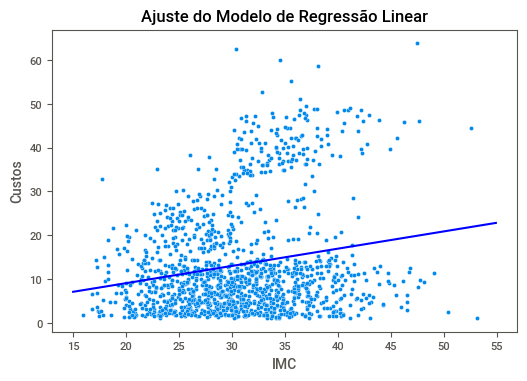

In [115]:
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

**Pronto, fizemos nosso modelo.** 

**Acabou Machine Learning.**

...

**Será?**

---

## **Métrica para Avaliação do Modelo**

In [142]:
# Erro Quadrático Médio

preditos = regressao.predict(X)
eqm = ((y - preditos)**2).mean() 

from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 50.13


---

## **Estratégia de Validação do Modelo**

In [60]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split 

In [ ]:
train_test_split(X, y, test_size = 0.25)

In [125]:
# Separe os dados em teste e treinamento 
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste) 

# Calcule o Erro Quadrático Médio nos dados de TESTE 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 141.9


In [67]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


**O método Holdout produz resultados com uma certa variabilidade, o que causa incerteza sobre o real valor do EQM do modelo**

**Como resolver?**

---

## **Alimentação do Modelo com mais Informações!**

In [127]:
# Considerando o modelo com DUAS variáveis preditoras

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC + b2 * FUMANTE**

In [146]:
# Repetindo o procedimento de Validação HOLDOUT
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)
preditos = regressao.predict(Xteste)
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 47.39


In [136]:
# Coeficientes
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -3.9811125963536487
b1 =  0.40738358987764883
b2 =  23.32062289273199


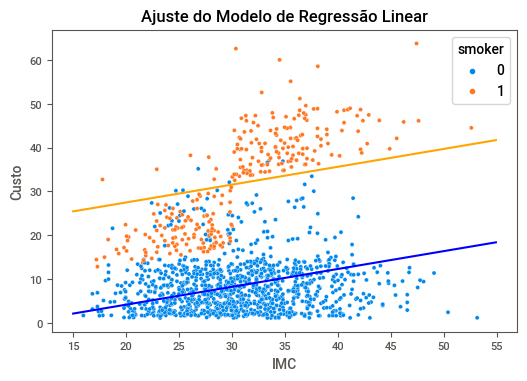

In [137]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

## **Exercício Proposto**

Faça repetições da técnica Holdout, de maneira a variar os dados que ficam no conjunto de treino e teste. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

---

**_#itstimetoflai_** 